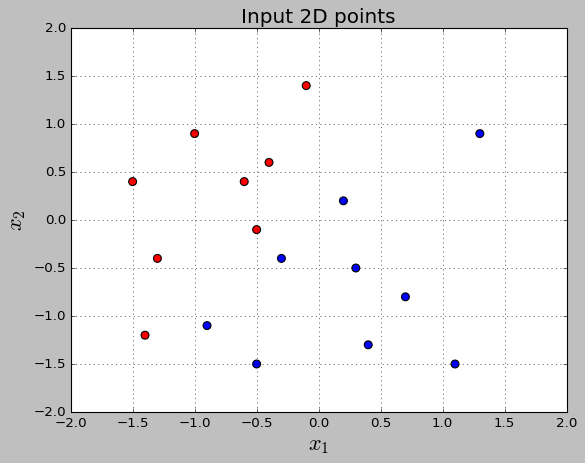

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])
colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])
  plt.savefig(path)

plot_scatter(X, y, colormap, 'Data.png')

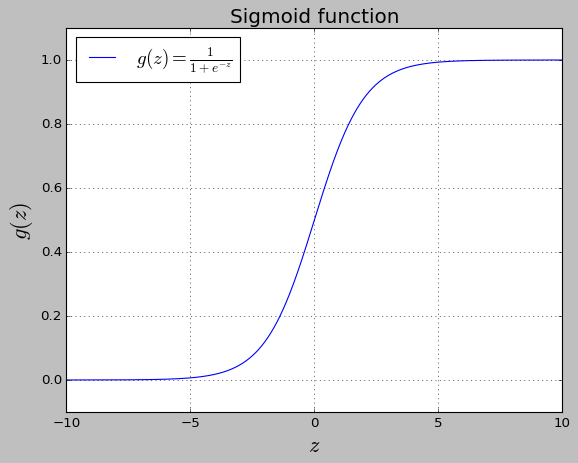

In [0]:
sigmoid = lambda x: 1/(1+np.exp(-x))

def plot_sigmoid():
  plt.grid()
  plt.xlim([-10.0, 10.0])
  plt.ylim([-0.1, 1.1])
  xs = np.arange(-10, 10, 0.001)
  plt.xlabel('$z$', size=20)
  plt.ylabel('$g(z)$', size=20)
  plt.title('Sigmoid function', size=18)
  plt.plot(xs, sigmoid(xs), label=r'$g(z)= \frac{1}{1+e^{-z}}$')
  plt.legend(loc='upper left', fontsize=17)
  plt.savefig('Sigmoid.png')

plot_sigmoid()

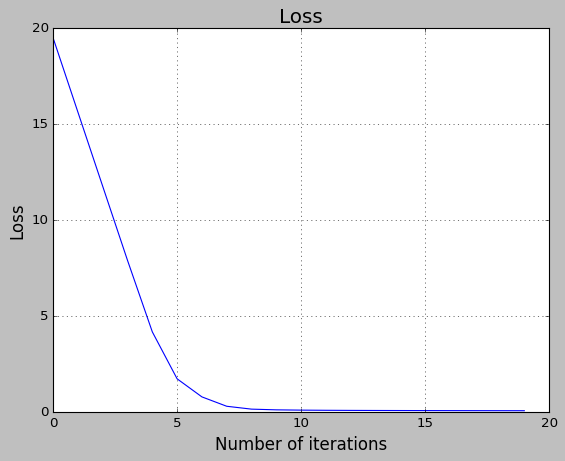

In [0]:
LEARNING_RATE = 8.0
NUM_EPOCHS = 20

def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))

w_cache = []
b_cache = []
l_cache = []

# some nice initial value, so that the plot looks nice.
w = np.array([-4.0, 29.0])
b = 0.0

for i in range(NUM_EPOCHS):
  dw = np.zeros(w.shape)
  db = 0.0
  loss = 0.0

  for j in range(X.shape[0]):
    x_j = X[j,:]
    y_j = y[j]

    z_j = w.dot(x_j) + b
    a_j = sigmoid(z_j)

    loss_j = get_loss_numerically_stable(y_j, z_j)

    dw_j = x_j * (a_j-y_j)
    db_j = a_j - y_j

    dw += dw_j
    db += db_j
    loss += loss_j

  # because we have 17 samples
  dw = (1.0/17) * dw
  db = (1.0/17) * db
  loss = (1.0/17) * loss

  w -= LEARNING_RATE * dw
  b -= LEARNING_RATE * db

  w_cache.append(w.copy())
  b_cache.append(b)
  l_cache.append(loss)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.plot(l_cache)

plt.savefig('Loss.png')


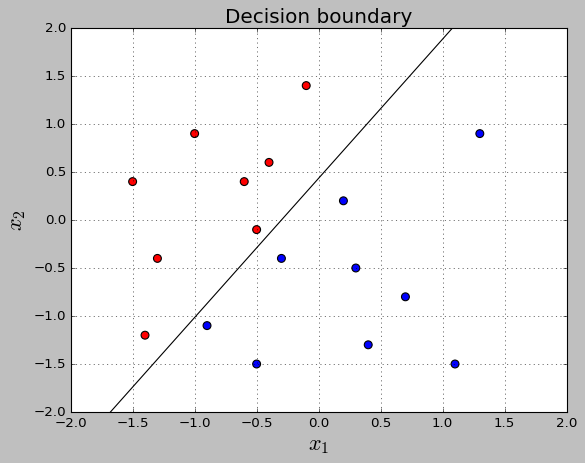

In [0]:
def plot_decision_boundary(X, y, w, b, path):
   plt.grid()
   plt.xlim([-2.0, 2.0])
   plt.ylim([-2.0, 2.0])
   plt.xlabel('$x_1$', size=20)
   plt.ylabel('$x_2$', size=20)
   plt.title('Decision boundary', size = 18)

   xs = np.array([-2.0, 2.0])
   ys = (-w[0] * xs - b)/w[1]

   plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
   plt.plot(xs, ys, c='black')
   plt.savefig(path)

plot_decision_boundary(X, y, w_cache[-1], b_cache[-1], 'Decision_Boundary.png')


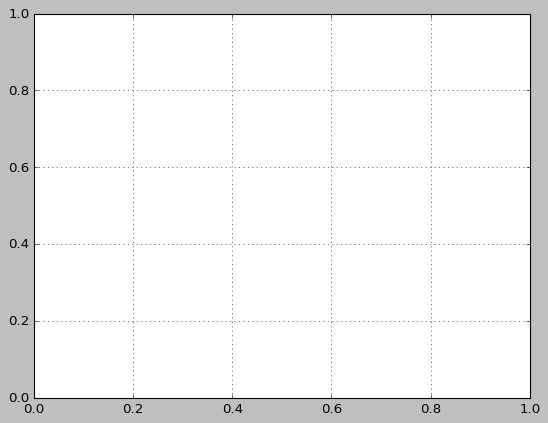

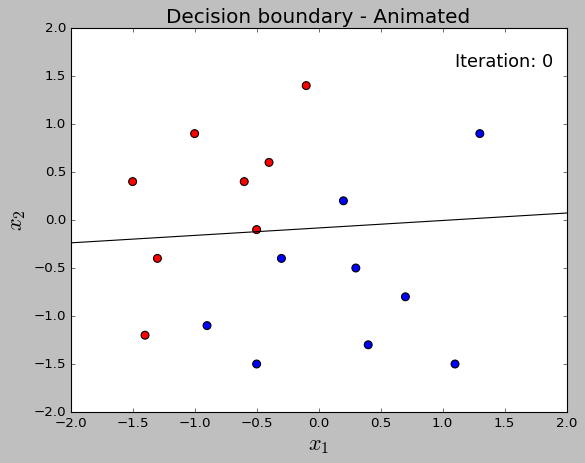

In [0]:
import matplotlib.animation as animation
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.0, 2.0])
ax.set_xlabel('$x_1$', size=20)
ax.set_ylabel('$x_2$', size=20)

ax.set_title('Decision boundary - Animated', size = 18)

def animate(i):
  xs = np.array([-2.0, 2.0])
  ys = (-w_cache[i][0] * xs - b)/w_cache[i][1]
  lines.set_data(xs, ys)

  text_box.set_text('Iteration: {}'.format(i))

  return lines, text_box

lines, = ax.plot([], [], c='black')
ax.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
text_box = ax.text(1.1, 1.6, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate,frames=20)
anim.save('Boundary_animation.mp4', fps=2)

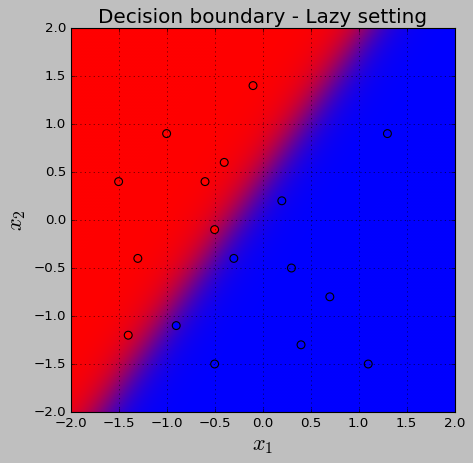

In [0]:
NX = 100
NY = 100

def plot_decision_boundary_lazy(X, y, w, b):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary - Lazy setting', size = 18)

  xs = np.linspace(-2.0, 2.0, NX)
  ys = np.linspace(2.0, -2.0, NY)
  xv, yv = np.meshgrid(xs, ys)

  X_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

  predictions = []
  for i in range(X_fake.shape[0]):
    predictions.append(sigmoid(w.dot(X_fake[i,:]) + b))

  predictions = np.array(predictions)
  predictions = np.stack( (1-predictions, np.zeros(NX * NY), predictions) )
  plt.imshow(predictions.T.reshape(NX, NY, 3), extent=[-2.0, 2.0, -2.0, 2.0])
  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y])

  plt.savefig('Shaded_boundary.png')

plot_decision_boundary_lazy(X, y, w_cache[-1], b_cache[-1])

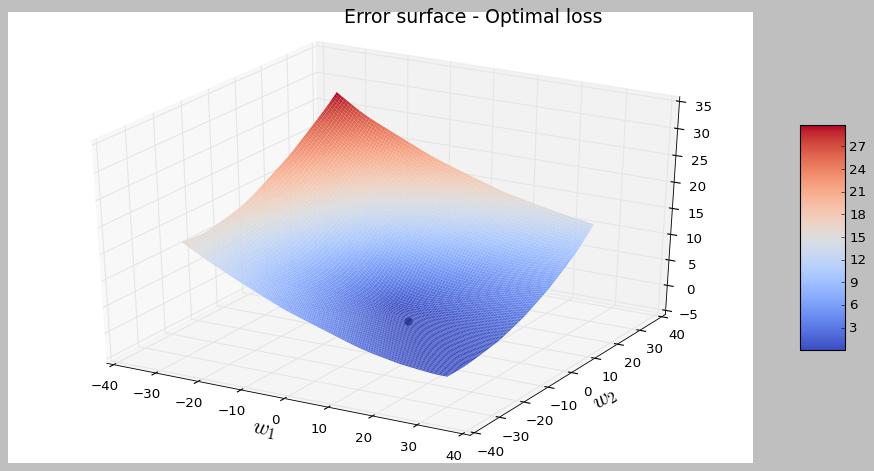

In [0]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

NX = 100
NY = 100

def get_average_loss(X, w, b):
  total_loss = 0.0
  for i in range(X.shape[0]):
    x_i = X[i,:]
    z = w.dot(x_i) + b
    total_loss += get_loss_numerically_stable(y[i], z)
  return total_loss / X.shape[0]

xs = np.linspace(-30, 30, NX)
ys = np.linspace(-30, 30, NY)
xv, yv = np.meshgrid(xs, ys)

w_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

losses = []
for i in range(w_fake.shape[0]):
  losses.append( get_average_loss(X, w_fake[i,:], b_cache[-1]) )

losses = np.array(losses)
min_loss = np.min(losses)

def plot_error_surface(X, y, best_w):
  #plt.grid()

  fig = plt.figure(figsize=(12,6))
  fig.suptitle('Error surface - Optimal loss', fontsize=17)
  ax = fig.gca(projection='3d')

  ax.set_xlabel('$w_1$', size=20)
  ax.set_ylabel('$w_2$', size=20)
  surf =ax.plot_surface(xv, yv, losses.reshape(NX, NY),cmap=cm.coolwarm,rstride=1, cstride=1, alpha=None,antialiased=True,linewidth=0)
  fig.colorbar(surf, shrink=0.5, aspect=5)
  ax.scatter(best_w[0], best_w[1], [min_loss], s=40, c='black')
  
  
  #fig.tight_layout()
  #plt.savefig('Error_Surface.png')

plot_error_surface(X, y, w_cache[-1])


IndexError: ignored

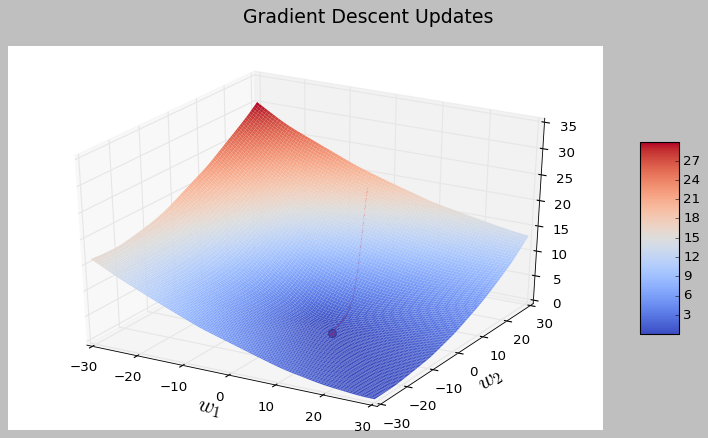

In [0]:
NX = 100
NY = 100

fig = plt.figure(figsize=(12,6))
fig.suptitle('Gradient Descent Updates', fontsize=17)
ax = fig.gca(projection='3d')

ax.set_xlabel('$w_1$', size=20)
ax.set_ylabel('$w_2$', size=20)
surf =ax.plot_surface(xv, yv, losses.reshape(NX, NY),cmap=cm.coolwarm,rstride=1, cstride=1, alpha=None,antialiased=True,linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)



def animate(i):
  graph.set_offsets([w_cache[i][0], w_cache[i][1]])
  graph.set_3d_properties([l_cache[i]], zdir='z')

  line_data[0].append(w_cache[i].flatten()[0])
  line_data[1].append(w_cache[i].flatten()[1])
  line_data[2].append(l_cache[i])

  lines.set_data(line_data[0], line_data[1])
  lines.set_3d_properties(line_data[2])

  text_box.set_text('Iteration: {}'.format(i))

  return graph, lines, text_box

line_data = [[], [], []]
graph = ax.scatter([], [], [], s=50, c='red')
lines, = ax.plot([], [], [], c='red')

text_box = ax.text(20.0, 20.0, 500.0, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate)
anim.save('animation.mp4', fps=2)

plt.close()
plt.clf()
plt.cla()